# Malnutrition Project
#### Factors that are most influential on the prevalence of malnutrition in South African children under the age of 5 years

In [2]:
# Import required libraries 
import pandas as pd
import numpy as np
# For encoding categorical variables
from sklearn.preprocessing import LabelEncoder,StandardScaler  

# libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode, plot
cf.go_offline()

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import data
data = pd.read_csv("C:/Users/Admin/Documents/Food Security Project/malnutrition.csv")

In [4]:
data.head()

,CASEID,BIDX,V000,V001,V002,V003,V004,V005,V006,V007,...,S526A,S526B,S526C,S526D,S526E,S526F,S526G,S526H,S526X,S526Z
0,1 13 2,1,ZA7,1,13,2,1,1396726,8,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 28 2,1,ZA7,1,28,2,1,1396726,8,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1 28 2,2,ZA7,1,28,2,1,1396726,8,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1 28 2,3,ZA7,1,28,2,1,1396726,8,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 36 2,1,ZA7,1,36,2,1,1396726,10,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Select the variables/columns that are relevant for the analysis

cols  = ['V005','HW1','HW70','HW71','HW72','V012','V152','V212','V730','B19','V151','B4','B8','V106','V107','V133','V149',
         'V701','V702','V715','V729','V113','V103','V024','V025','V501','V704','V705','V716','V717','M18','HW2','HW3','V409',
         'V131','V136','V153','V190','V190A','V191','V201']

selected_data = data.loc[:,cols]

In [6]:
# Create sampling weight variable by dividing V005(individual sample weight by 1 000 000)            

selected_data['Sample_Weight'] = selected_data['V005']/1000000

In [7]:
selected_data.head()

,V005,HW1,HW70,HW71,HW72,V012,V152,V212,V730,B19,...,HW3,V409,V131,V136,V153,V190,V190A,V191,V201,Sample_Weight
0,1396726,NaN,NaN,NaN,NaN,41,44,25,44.0,196,...,NaN,NaN,1,2,0,2,1,-30340,1,1.396726
1,1396726,53.0,NaN,NaN,NaN,41,43,25,43.0,53,...,9996.0,NaN,1,5,0,5,5,132058,3,1.396726
2,1396726,53.0,-255.0,-271.0,-169.0,41,43,25,43.0,53,...,946.0,NaN,1,5,0,5,5,132058,3,1.396726
3,1396726,NaN,NaN,NaN,NaN,41,43,25,43.0,187,...,NaN,NaN,1,5,0,5,5,132058,3,1.396726
4,1396726,NaN,NaN,NaN,NaN,27,31,23,31.0,51,...,NaN,NaN,1,2,0,4,4,102541,1,1.396726


In [8]:
# Check for percentage of missing values in the selected variables/columns 
# sort them in descending order

selected_data.isnull().sum().sort_values(ascending = False)/len(selected_data)*100 

HW72             92.102658
HW71             92.039027
HW70             92.017817
HW3              89.727093
HW2              89.727093
HW1              89.677602
V409             80.542986
M18              74.915158
V705             62.245475
V704             62.245475
V702             56.313631
V729             52.319005
V701             52.319005
V715             52.319005
V730             50.763575
V103             44.725679
B8                6.002545
V107              4.192590
V133              0.000000
B19               0.000000
V151              0.000000
B4                0.000000
V106              0.000000
V212              0.000000
V152              0.000000
V012              0.000000
Sample_Weight     0.000000
V149              0.000000
V201              0.000000
V113              0.000000
V024              0.000000
V025              0.000000
V501              0.000000
V716              0.000000
V717              0.000000
V131              0.000000
V136              0.000000
V

In [119]:
# There are 7 variables (HW72, HW71, HW70, HW3, HW2, HW1, V409) with 80% or more missing information
# And 8 variables (M18, V705, V704, V702, V729, V701, V715, V730) with 50% or more missing information

In [120]:
# The 92% missing information in HW1 (children's age in months) is because of it relates to children above 5 years
# we need to extract only those below 5 years (<=59 months)

In [9]:
# Select the data relating to only children less than 5 years (HW1 <=59 months)

selected_data = selected_data[ selected_data.HW1.notnull()]

In [10]:
selected_data.head()

,V005,HW1,HW70,HW71,HW72,V012,V152,V212,V730,B19,...,HW3,V409,V131,V136,V153,V190,V190A,V191,V201,Sample_Weight
1,1396726,53.0,NaN,NaN,NaN,41,43,25,43.0,53,...,9996.0,NaN,1,5,0,5,5,132058,3,1.396726
2,1396726,53.0,-255.0,-271.0,-169.0,41,43,25,43.0,53,...,946.0,NaN,1,5,0,5,5,132058,3,1.396726
11,1206331,29.0,-198.0,155.0,363.0,26,60,17,33.0,29,...,836.0,NaN,1,8,0,2,4,-17777,3,1.206331
23,1206331,29.0,-70.0,143.0,250.0,31,45,28,NaN,29,...,894.0,NaN,1,5,0,3,5,28812,1,1.206331
24,1206331,5.0,-96.0,212.0,349.0,22,45,22,NaN,5,...,650.0,0.0,1,5,0,3,5,28812,1,1.206331


In [11]:
# There are 1460 records relating to children below 5 years

selected_data.shape

(1460, 42)

In [12]:
# Check the missingness again in the selected data relating to children less than 5 years (<=59 months)

selected_data.isnull().sum().sort_values(ascending = False)/len(selected_data)*100 

V705             67.602740
V704             67.602740
V702             63.835616
V729             61.506849
V715             61.506849
V701             61.506849
V730             59.794521
V103             53.904110
V409             50.342466
HW72             23.493151
HW71             22.876712
HW70             22.671233
V107              1.780822
HW2               0.479452
HW3               0.479452
V212              0.000000
V133              0.000000
B19               0.000000
V152              0.000000
V151              0.000000
B4                0.000000
B8                0.000000
V106              0.000000
HW1               0.000000
V012              0.000000
Sample_Weight     0.000000
V149              0.000000
V201              0.000000
V113              0.000000
V024              0.000000
V025              0.000000
V501              0.000000
V716              0.000000
V717              0.000000
M18               0.000000
V131              0.000000
V136              0.000000
V

In [13]:
# There is still some missing information on variables such as HW70(heigh-for-age), HW71(weight-for-age)
# and HW7(weight-for-height). Wr will need these variables to create the indicators of malnutrition.
# So we need to deal with this information, first understand why this information is missing.

# “Exclude those whose z-score was recorded in the database as “Height out of plausible limits (9995) for height,” 
# or “Age in days out of plausible limits(9996)” or “Flagged cases”,or 
# "Weight out of plausible limits, for Weight" as their values were unusable since
# they were recorded in the database under special codes which corresponded either 
# to responses that were considered inconsistent with other responses in the questionnaire 
# and thought to be probably an error, or to responses which value was “Don’t know”


In [14]:
# So we exclude the records with the above codes from the data

selected_data = selected_data.dropna(subset=['HW70','HW71','HW72'])


In [15]:
selected_data.isnull().sum().sort_values(ascending = False)/len(selected_data)*100 

V704             70.430108
V705             70.430108
V702             65.770609
V701             63.620072
V715             63.620072
V729             63.620072
V730             62.007168
V103             53.673835
V409             50.716846
V107              2.060932
V012              0.000000
B8                0.000000
HW1               0.000000
V149              0.000000
V133              0.000000
V106              0.000000
HW70              0.000000
V152              0.000000
HW71              0.000000
B4                0.000000
HW72              0.000000
B19               0.000000
V212              0.000000
V151              0.000000
Sample_Weight     0.000000
V201              0.000000
HW3               0.000000
V191              0.000000
V190A             0.000000
V190              0.000000
V153              0.000000
V136              0.000000
V131              0.000000
HW2               0.000000
V113              0.000000
M18               0.000000
V717              0.000000
V

In [16]:
selected_data.shape

(1116, 42)

In [17]:
# Descriptive statistics of the data
selected_data.describe()

,V005,HW1,HW70,HW71,HW72,V012,V152,V212,V730,B19,...,HW3,V409,V131,V136,V153,V190,V190A,V191,V201,Sample_Weight
count,1.116000e+03,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,424.000000,1116.000000,...,1116.000000,550.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,9.725259e+05,29.306452,21.992832,43.213262,371.443548,29.019713,47.777778,20.570789,36.978774,29.269713,...,844.552867,0.703636,1.169355,6.352151,0.234767,2.592294,2.804659,-25006.981183,2.446237,0.972526
std,8.182862e+05,17.627618,1173.526276,800.871870,1737.697938,6.762702,16.282784,3.937791,8.101719,17.612415,...,153.168285,0.557598,0.559462,3.177077,1.208524,1.266149,1.376098,97849.179369,1.506867,0.818286
min,8.283000e+04,0.000000,-535.000000,-557.000000,-456.000000,15.000000,18.000000,13.000000,18.000000,0.000000,...,200.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,-264286.000000,1.000000,0.082830
25%,5.452150e+05,14.000000,-203.000000,-94.000000,-15.000000,24.000000,35.000000,18.000000,31.000000,14.000000,...,745.000000,0.000000,1.000000,4.000000,0.000000,1.000000,2.000000,-83729.000000,1.000000,0.545215
50%,7.288240e+05,30.000000,-113.000000,-23.000000,61.000000,28.000000,45.000000,20.000000,36.000000,29.500000,...,864.500000,1.000000,1.000000,6.000000,0.000000,3.000000,3.000000,-15224.000000,2.000000,0.728824
75%,1.014681e+06,44.000000,-26.000000,58.000000,147.000000,34.000000,60.000000,23.000000,42.000000,44.000000,...,964.000000,1.000000,1.000000,8.000000,0.000000,4.000000,4.000000,48809.750000,3.000000,1.014681
max,4.233035e+06,59.000000,9998.000000,9998.000000,9998.000000,49.000000,98.000000,42.000000,72.000000,59.000000,...,1249.000000,8.000000,4.000000,24.000000,7.000000,5.000000,5.000000,180860.000000,11.000000,4.233035


# Feature engineering

In [18]:
# Create malnutrition indicators
# Yes -  if a child is stunted, wasted, overweight or underweight, 
# No - otherwise

selected_data['Stunting'] = np.where(selected_data['HW70'] < -200, 'Yes',(np.where(selected_data.HW70.isnull(),'NaN','No')))
selected_data['Wasting'] = np.where(selected_data['HW72'] < -200, 'Yes',(np.where(selected_data.HW72.isnull(),'NaN','No'))) 
selected_data['Overweight'] = np.where((selected_data['HW72'] > 200) & (selected_data['HW72'] <  9990),'Yes',
                                       (np.where(selected_data.HW72.isnull(),'NaN','No')))
selected_data['Underweight'] = np.where(selected_data['HW71'] < -200, 'Yes',(np.where(selected_data.HW71.isnull(),'NaN','No'))) 

In [19]:
# Create a dependent variable (binary) (malnourished vs. Normal)
# i.e whether a child is malnourished or is normal
# There should be atleast one "Yes" in the malnutrition indicators for a child to be malnoursished
# But a child cannot be both underweight and overweight

selected_data['Malnutrition']=np.where((selected_data['Stunting']=='Yes') | (selected_data['Wasting']=='Yes') |
        (selected_data['Overweight']=='Yes') | (selected_data['Underweight']=='Yes'),'Malnourished','Normal')

In [20]:
selected_data.head()

,V005,HW1,HW70,HW71,HW72,V012,V152,V212,V730,B19,...,V190,V190A,V191,V201,Sample_Weight,Stunting,Wasting,Overweight,Underweight,Malnutrition
2,1396726,53.0,-255.0,-271.0,-169.0,41,43,25,43.0,53,...,5,5,132058,3,1.396726,Yes,No,No,Yes,Malnourished
11,1206331,29.0,-198.0,155.0,363.0,26,60,17,33.0,29,...,2,4,-17777,3,1.206331,No,No,Yes,No,Malnourished
23,1206331,29.0,-70.0,143.0,250.0,31,45,28,NaN,29,...,3,5,28812,1,1.206331,No,No,Yes,No,Malnourished
24,1206331,5.0,-96.0,212.0,349.0,22,45,22,NaN,5,...,3,5,28812,1,1.206331,No,No,Yes,No,Malnourished
51,513611,54.0,-141.0,-64.0,36.0,25,54,20,NaN,54,...,1,1,-225902,1,0.513611,No,No,No,No,Normal


# Data Visualization

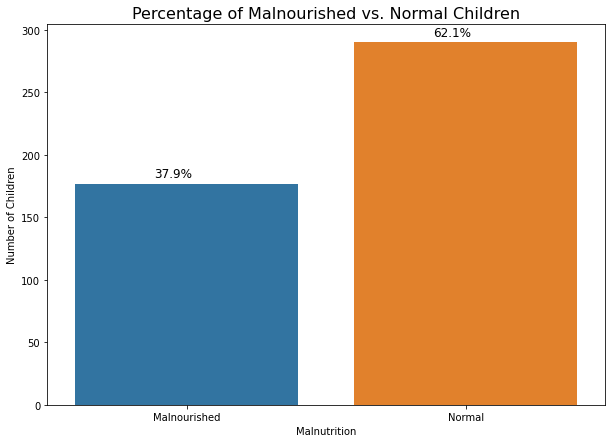

In [21]:
def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

plt.figure(figsize=(10,7))
plot = sns.countplot('Malnutrition', data=df)
total = len(df['Sample_Weight'])
for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12,ha = 'center', va = 'center', xytext = (0, 10), 
                                                                        textcoords = 'offset points')
plt.ylabel('Number of Children')
plt.title("Percentage of Malnourished vs. Normal Children",fontsize= 16)
plt.show()

In [134]:
# About 37.9% children are malnourished (meaning either a child is stunted, wasted, overweight or underweight)

In [42]:
def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

plt.figure(figsize=(10,7))

mal_val = df['Malnutrition'].value_counts()
mal_df = pd.DataFrame({'labels': mal_val.index,'values': mal_val.values})

plot = mal_df.iplot(kind='pie',labels='labels',values='values', 
                  title='Percentage of Malnourished vs. Normal Children', hole = 0.6,color=['seagreen','red'])
total = len(df['Sample_Weight'])
for p in plot:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12,ha = 'center', va = 'center', xytext = (0, 10), 
                                                                        textcoords = 'offset points')

TypeError: 'NoneType' object is not iterable

<Figure size 720x504 with 0 Axes>

### Below we will look at the prevalence of each of the malnutrition indicators

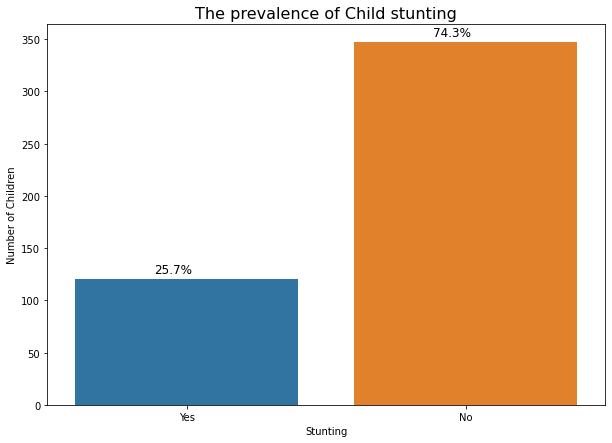

In [23]:
# Stunting

# --- First define a function called "reindex_dt" that will be used to do the plots for the indicators
# and incorporate for the complex sample weight ("Sample_Weight")

def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

plt.figure(figsize=(10,7))
plot = sns.countplot('Stunting', data=df)
total = len(df['Sample_Weight'])
for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12,ha = 'center', va = 'center', xytext = (0, 10), 
                                                                        textcoords = 'offset points')
plt.ylabel('Number of Children')
plt.title("The prevalence of Child stunting",fontsize= 16)
plt.show()

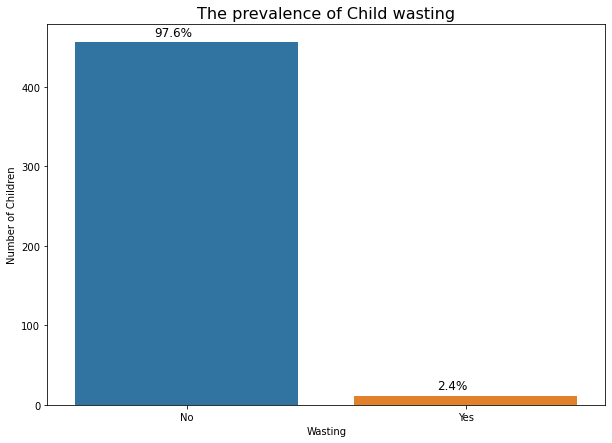

In [24]:
# Wasting
# again incorporate for the sample weight 

def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

plt.figure(figsize=(10,7))
plot = sns.countplot('Wasting', data=df)
total = len(df['Sample_Weight'])
for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12,ha = 'center', va = 'center', xytext = (0, 10), 
                                                                        textcoords = 'offset points')
plt.ylabel('Number of Children')
plt.title("The prevalence of Child wasting",fontsize= 16)
plt.show()

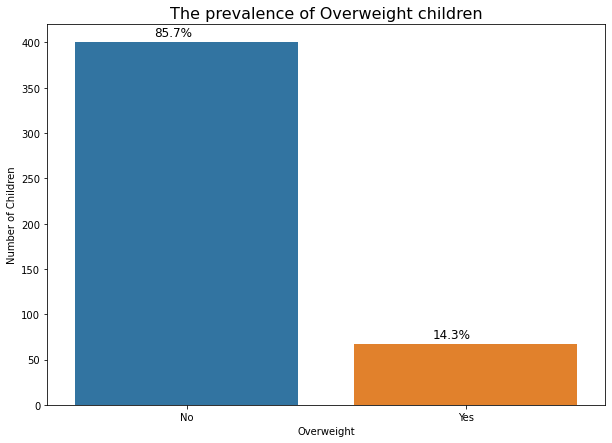

In [25]:
# Overweight

def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

plt.figure(figsize=(10,7))
plot = sns.countplot('Overweight', data=df)
total = len(df['Sample_Weight'])
for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12,ha = 'center', va = 'center', xytext = (0, 10), 
                                                                        textcoords = 'offset points')
plt.ylabel('Number of Children')
plt.title("The prevalence of Overweight children",fontsize= 16)
plt.show()

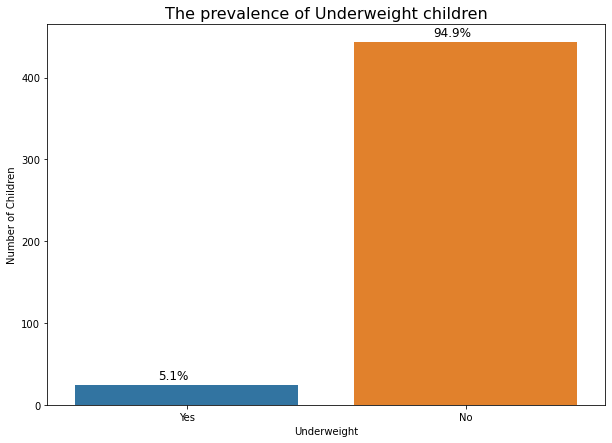

In [26]:
# Underweight
# Also incorporate for sampling weight

def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

plt.figure(figsize=(10,7))
plot = sns.countplot('Underweight', data=df)
total = len(df['Sample_Weight'])
for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12,ha = 'center', va = 'center', xytext = (0, 10), 
                                                                        textcoords = 'offset points')
plt.ylabel('Number of Children')
plt.title("The prevalence of Underweight children",fontsize= 16)
plt.show()

In [140]:
# From the above plots Stunting appears to be the most prevalent (25.7%) form of malnutrition present
# in South African children under 5 years of age 

In [21]:
# Use label encoder to encoder the malnutrition indicators so that when we fit the model they're already numeric
# For malnutrition indicators: 1-Yes, 0-No  
# For Malnutrition (dependent variable): 1-Malnourished, 0-Normal

selected_data['Malnutrition'] = np.where(selected_data['Malnutrition']=='Malnourished',1,0)
selected_data['Stunting'] = np.where(selected_data['Stunting']=='Yes',1,0)
selected_data['Wasting'] = np.where(selected_data['Wasting']=='Yes',1,0)
selected_data['Overweight'] = np.where(selected_data['Overweight']=='Yes',1,0)
selected_data['Underweight'] = np.where(selected_data['Underweight']=='Yes',1,0)

#### Let's look at how other features relate to each of the malnutrition indicators and the dependant variable (malnutrition)

##### By first looking at the categorical variables 
##### NB : All the plots incorporate for the sampling weight

<Figure size 720x504 with 0 Axes>

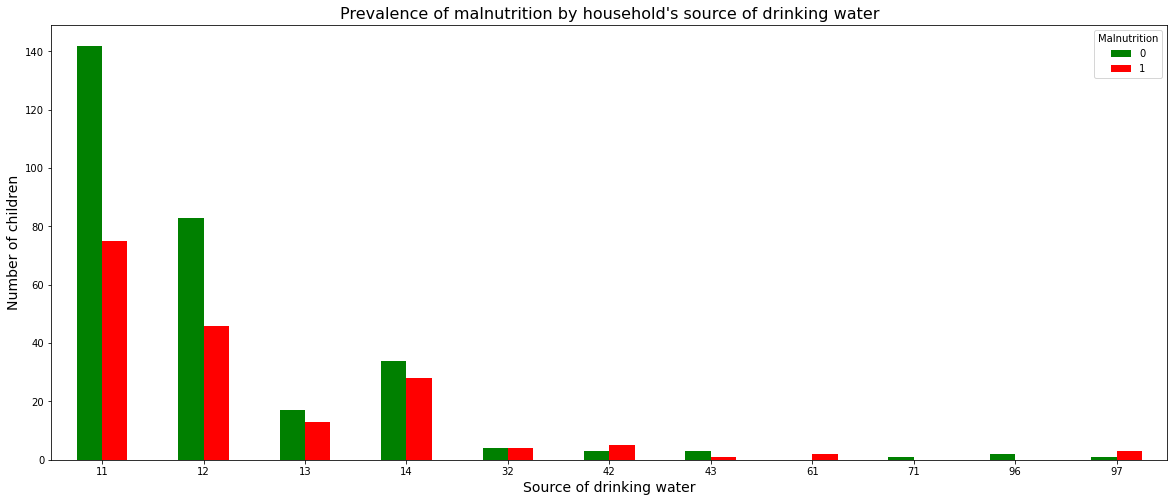

In [28]:
# Source of drinking water - V113
# 10	piped water
# 11	piped into dwelling
# 12	piped to yard/plot
# 13	piped to neighbor
# 14	public tap/standpipe
# 20	tube well water 
# 21	tube well or borehole
# 30	dug well (open/protected)
# 31	protected well
# 32	unprotected well
# 40	surface from spring
# 41	protected spring
# 42	unprotected spring
# 43	river/dam/lake/ponds/stream/canal/irrigation channel
# 51	rainwater
# 61	tanker truck
# 62	cart with small tank
# 71	bottled water
# 96	other

# From the plot below it's clear that the prevalence of malnutrition is higher among those children
# from households using piped water (11 and 12) and public tap(14) as their major source of drinking water
# "Microorganisms occur in piped distributions from source water (WHO)"

plt.figure(figsize=(10,7))
def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

source_ofdrinkingwater_plot = pd.crosstab(df['V113'], df['Malnutrition'])
source_ofdrinkingwater_plot.plot(kind='bar', stacked=False,color=['green','red'], figsize=(20,8))

plt.xlabel("Source of drinking water",fontsize=14)
plt.ylabel("Number of children",fontsize=14)
plt.xticks(rotation=0)
plt.title("Prevalence of malnutrition by household's source of drinking water",fontsize=16);
plt.show()

<Figure size 1080x432 with 0 Axes>

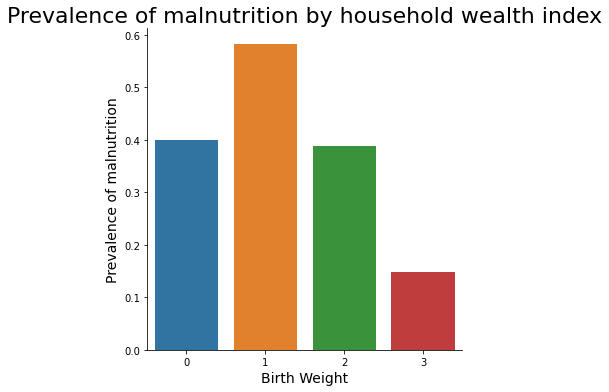

In [61]:
plt.figure(figsize=(15,6))
def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

sns.catplot(x="V106", y="Malnutrition", kind="bar", data=df,ci=None)
plt.xlabel("Birth Weight",fontsize=14)
plt.ylabel("Prevalence of malnutrition",fontsize=14)
plt.xticks(rotation=0)
plt.title("Prevalence of malnutrition by household wealth index",fontsize=22);

<Figure size 720x504 with 0 Axes>

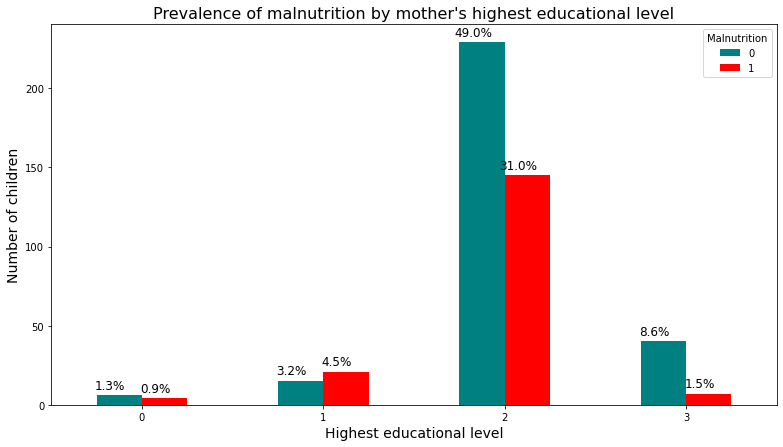

In [33]:
# Mother's/Partner's Educational level - V106
# 0	no education
# 1	primary
# 2	secondary
# 3	higher

# From the plot below it's clear that the prevalence of malnutrition is higher among those children
# whom their mothers have secondary school(2) as their highest educational level

plt.figure(figsize=(10,7))
def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

edu_plot = pd.crosstab(df['V106'], df['Malnutrition'])
edu_plot = edu_plot.plot(kind='bar', stacked=False, figsize=(13,7),color=['teal','red'])

total = len(df['Sample_Weight'])
for p in edu_plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        edu_plot.annotate(percentage, (x, y), size = 12,ha = 'center', va = 'center', xytext = (0, 10), 
                                                                        textcoords = 'offset points');
plt.xlabel("Highest educational level",fontsize=14)
plt.ylabel("Number of children",fontsize=14)
plt.xticks(rotation=0)
plt.title("Prevalence of malnutrition by mother's highest educational level",fontsize=16);


<Figure size 720x504 with 0 Axes>

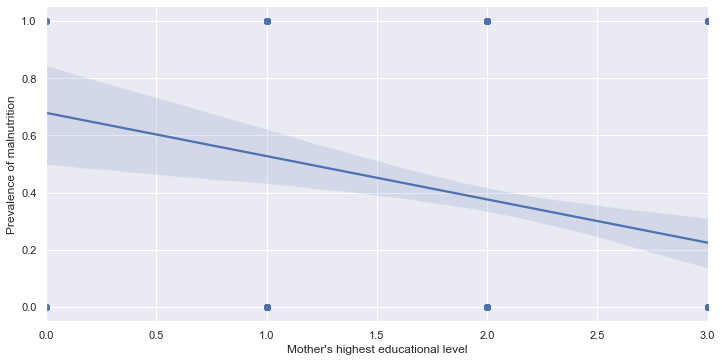

In [144]:
# The prevalence of malnutrition decreases as the mother's highest educational level increases
# This can be seen from the plot below

plt.figure(figsize=(10,7))
def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

sns.lmplot(x='V106',y='Malnutrition',data=df, palette='Set1',aspect=2)
plt.xlabel("Mother's highest educational level",fontsize=12)
plt.ylabel("Prevalence of malnutrition",fontsize=12);

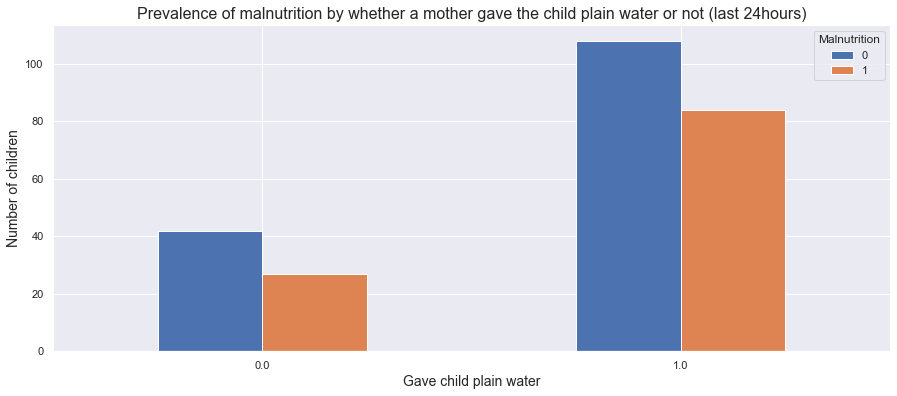

In [145]:
# Mother Gave child Plain water - 1-Yes, 0-No, 8-Don't know
# From the plot below, there prevalence of malnutrition 
# is higher among those children given plain water, but this ONLY in the last 24hours before the interview 

def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')


water = pd.crosstab(df['V409'], df['Malnutrition'])
water.plot(kind='bar', stacked=False, figsize=(15,6))
plt.xlabel("Gave child plain water",fontsize=14)
plt.ylabel("Number of children",fontsize=14)
plt.xticks(rotation=0)
plt.title("Prevalence of malnutrition by whether a mother gave the child plain water or not (last 24hours)",fontsize=16);

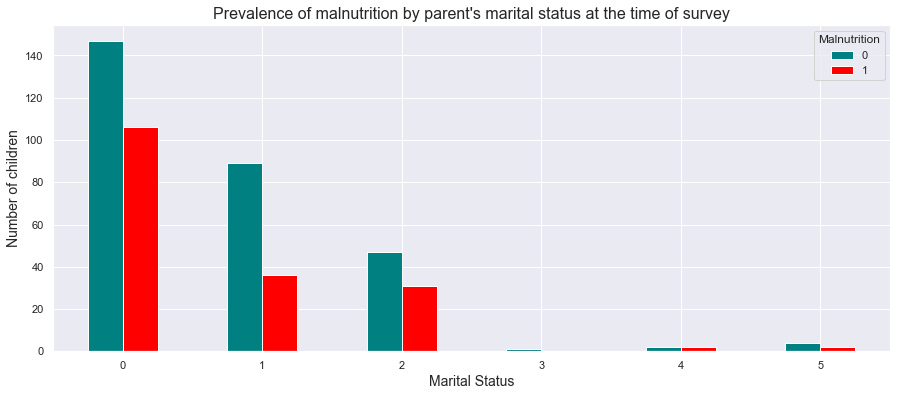

In [146]:
# Current marital status :
 # 0-Never married
 # 1-Legally or formally married
# 2-Not legally or formally married but living with a man/woman in a consensual union
# 3- Widowed
# 4-Divorced
# 5-Married or living in a union

# From th plot below it is clear that the prevalence of malnutrition is higher among children with single parents
# and very low among children with married parents

def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

marital_status = pd.crosstab(df['V501'], df['Malnutrition'])
marital_status.plot(kind='bar', stacked=False, figsize=(15,6),color=['teal','red'])
plt.xlabel("Marital Status",fontsize=14)
plt.ylabel("Number of children",fontsize=14)
plt.xticks(rotation=0)
plt.title("Prevalence of malnutrition by parent's marital status at the time of survey",fontsize=16);

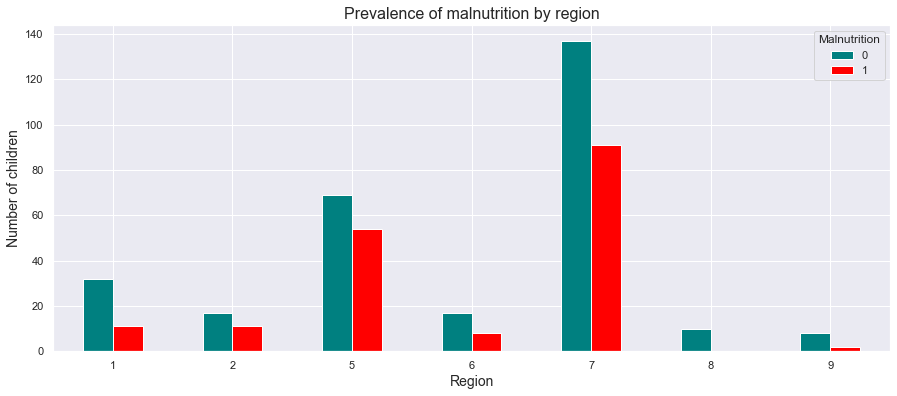

In [147]:
# Region/Province - V024
#1	western cape
#2	eastern cape
#3	northern cape
#4	free state
#5	kwazulu natal
#6	north west
#7	gauteng
#8	mpumalanga
#9	limpopo

# High prevalence of malutrition in children from Kwazulu-Natal,Eastern Cape and Limpopo

def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

region = pd.crosstab(df['V024'], df['Malnutrition'])
region.plot(kind='bar', stacked=False, figsize=(15,6),color=['teal','red'])
plt.xlabel("Region",fontsize=14)
plt.ylabel("Number of children",fontsize=14)
plt.xticks(rotation=0)
plt.title("Prevalence of malnutrition by region",fontsize=16);


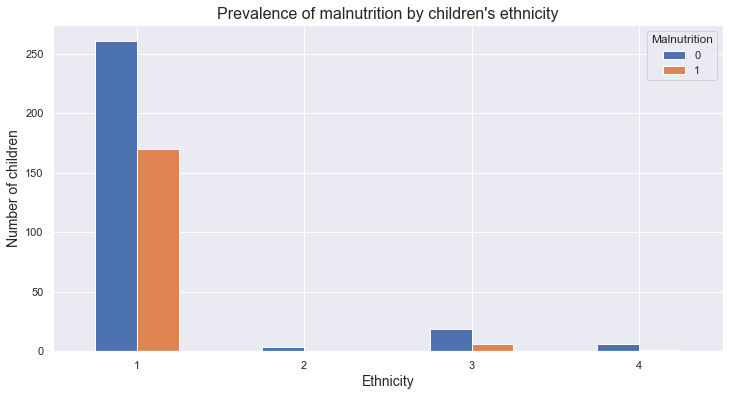

In [148]:
# Ethnicity - V131
#1	black/african
#2	white
#3	coloured
#4	indian
#996	other

# Higher prevalence of malnutrition among black/african children

def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

ethnicity = pd.crosstab(df['V131'], df['Malnutrition'])
ethnicity.plot(kind='bar', stacked=False, figsize=(12,6))
plt.xlabel("Ethnicity",fontsize=14)
plt.ylabel("Number of children",fontsize=14)
plt.xticks(rotation=0)
plt.title("Prevalence of malnutrition by children's ethnicity",fontsize=16);

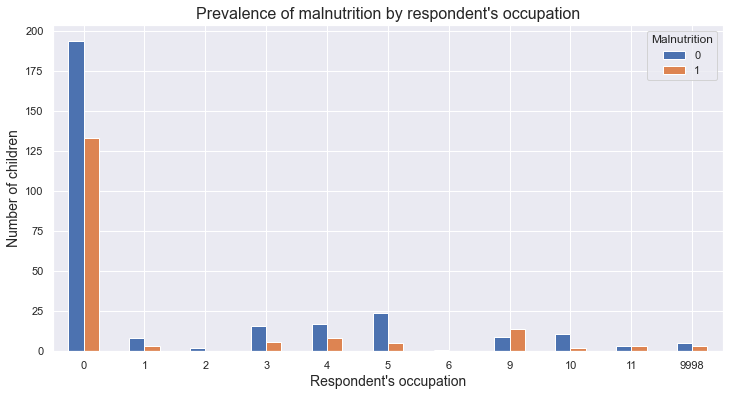

In [149]:
# v716 respondent's occupation
# 0	not working
# 1	professional/technical/managerial
# 2	clerical
# 3	sales
# 4	agricultural - self employed
# 5	agricultural - unskilled
# 6	household and domestic
# 7	services
# 8	skilled manual
# 9	unskilled manual
# 10-domestic workers
# 11-agricultural unskilled
# 98-don't know

# Higher prevalence of malnutrition among children with unemployed parents

def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

occupation = pd.crosstab(df['V716'], df['Malnutrition'])
occupation.plot(kind='bar', stacked=False, figsize=(12,6))
plt.xlabel("Respondent's occupation",fontsize=14)
plt.ylabel("Number of children",fontsize=14)
plt.xticks(rotation=0)
plt.title("Prevalence of malnutrition by respondent's occupation",fontsize=16);

<Figure size 1080x432 with 0 Axes>

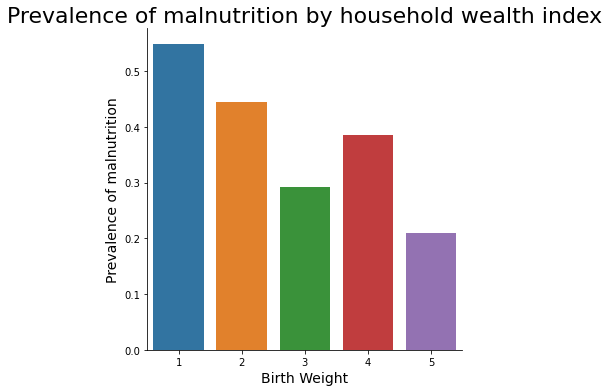

In [59]:
plt.figure(figsize=(15,6))
def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

sns.catplot(x="V190", y="Malnutrition", kind="bar", data=df,ci=None)
plt.xlabel("Birth Weight",fontsize=14)
plt.ylabel("Prevalence of malnutrition",fontsize=14)
plt.xticks(rotation=0)
plt.title("Prevalence of malnutrition by household wealth index",fontsize=22);

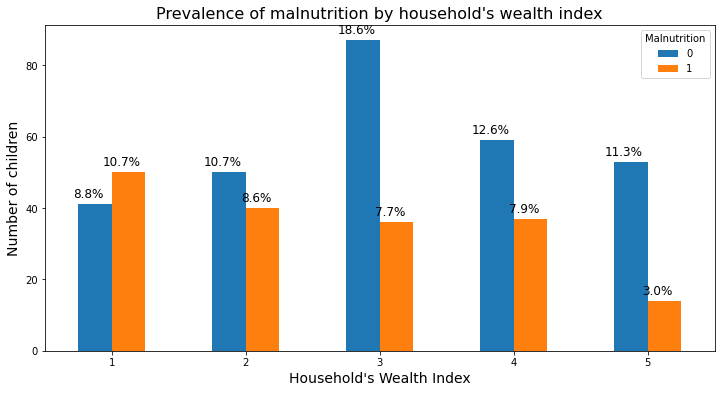

In [35]:
# Wealth index - V190
# 1	poorest
# 2	poorer
# 3	middle
# 4	richer
# 5	richest

# The below plot clearly shows that the prevalence of malnutrition decreases as the household's wealth index increases

def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

wealth = pd.crosstab(df['V190'], df['Malnutrition'])
wealth = wealth.plot(kind='bar', stacked=False, figsize=(12,6))

total = len(df['Sample_Weight'])
for p in wealth.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        wealth.annotate(percentage, (x, y), size = 12,ha = 'center', va = 'center', xytext = (0, 10), 
                                                                        textcoords = 'offset points')
plt.xlabel("Household's Wealth Index",fontsize=14)
plt.ylabel("Number of children",fontsize=14)
plt.xticks(rotation=0)
plt.title("Prevalence of malnutrition by household's wealth index",fontsize=16);

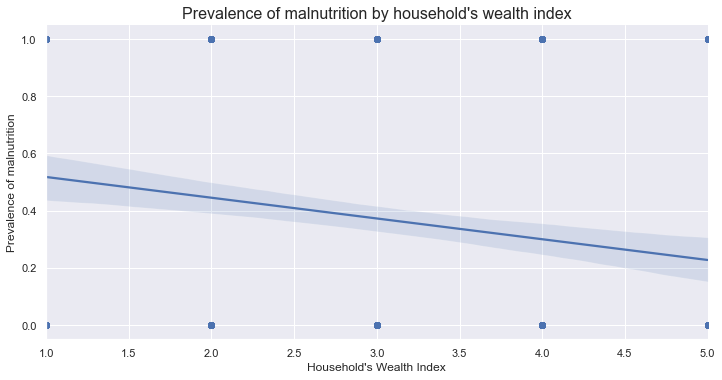

In [151]:
# clear indication of what the above plot depitcs
# prevalence of malnutrition decreases as the household's wealth index increases

def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

sns.lmplot(x='V190',y='Malnutrition',data=df, palette='Set1',aspect=2)
plt.xlabel("Household's Wealth Index",fontsize=12)
plt.ylabel("Prevalence of malnutrition",fontsize=12)
plt.title("Prevalence of malnutrition by household's wealth index",fontsize=16);

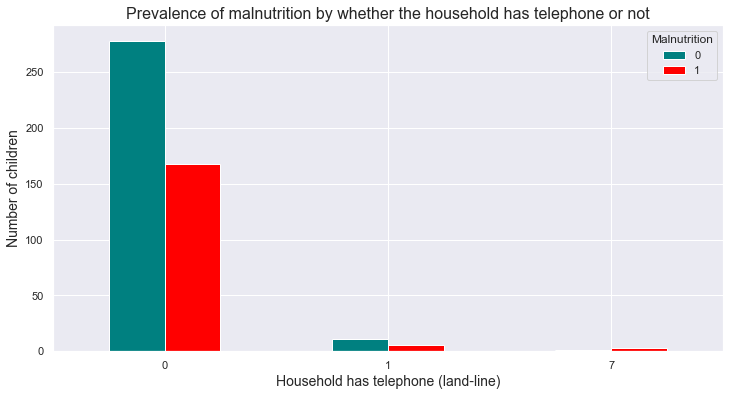

In [152]:
# household has: telephone (land-line) - V153
# 0	no
# 1	yes


#Higher prevalence of malnutrition among children coming from househols with no land-line telephone

def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

tele = pd.crosstab(df['V153'], df['Malnutrition'])
tele.plot(kind='bar', stacked=False, figsize=(12,6),color=['teal','red'])
plt.xlabel("Household has telephone (land-line)",fontsize=14)
plt.ylabel("Number of children",fontsize=14)
plt.xticks(rotation=0)
plt.title("Prevalence of malnutrition by whether the household has telephone or not",fontsize=16);

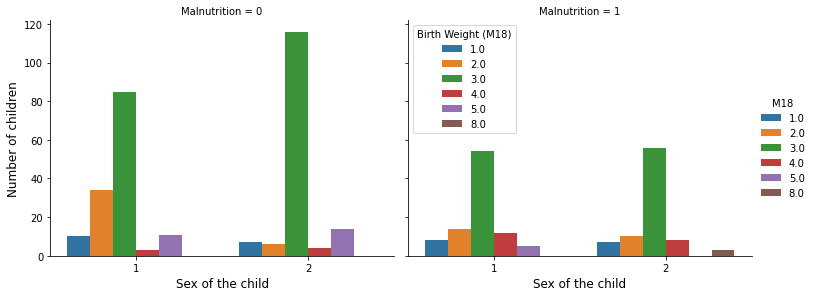

In [42]:
# size of child at birth (Birth Weight) - M18 
# 1	very large
# 2	larger than normal (4.5kg or more at birth)
# 3	normal (between 2.5kg and 4.5kg)
# 4	smaller than normal(less than 2.5kg at birth)
# 5	very small
# 8	don't know

# B4-Sex of child
# 1	male
# 2	female

# Prevalence of malnutrition increases with a decrease in the size of the child.
# The prevalence of malnutrition among male children who were average in size at birth (3) tend to be higher
# than female children born with the same size

def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

g = sns.catplot(x="B4", hue="M18", col="Malnutrition",
                data=df, kind="count",
                height=4, aspect=1.3)

g.set_xlabels('Sex of the child', fontsize=12) 
g.set_ylabels('Number of children', fontsize=12)
plt.legend().set_title('Birth Weight (M18)');

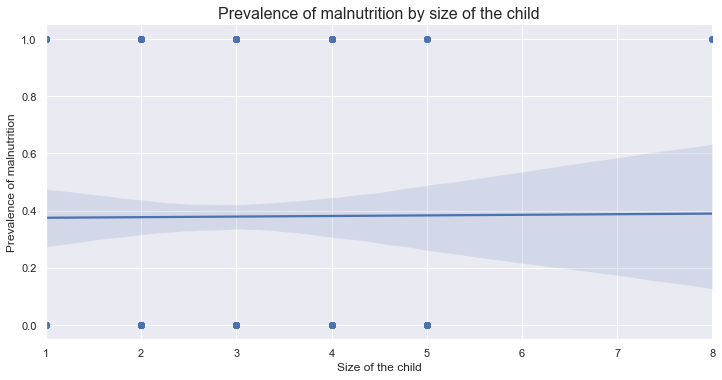

In [154]:
# Prevalence of malnutrition increases with a decrease in the size of the child

def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

sns.lmplot(x='M18',y='Malnutrition',data=df, palette='Set1',aspect=2)
plt.xlabel("Size of the child",fontsize=12)
plt.ylabel("Prevalence of malnutrition",fontsize=12)
plt.title("Prevalence of malnutrition by size of the child",fontsize=16);

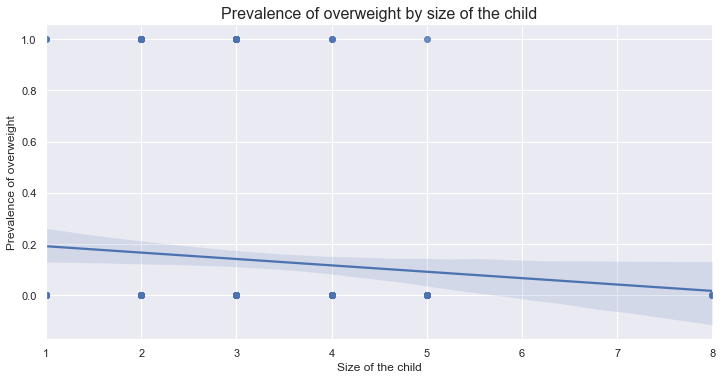

In [155]:
# Overweight vs. Size of the child
# Obviously as the child becomes smaller, the prevalence of overweight decreases

def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

sns.lmplot(x='M18',y='Overweight',data=df, palette='Set1',aspect=2)
plt.xlabel("Size of the child",fontsize=12)
plt.ylabel("Prevalence of overweight",fontsize=12)
plt.title("Prevalence of overweight by size of the child",fontsize=16);

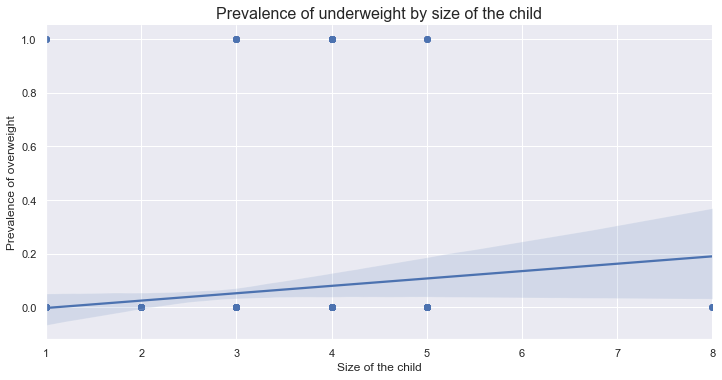

In [156]:
# Overweight vs. Size of the child
# Obviously as the child becomes smaller, the prevalence of underweight increases

def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

sns.lmplot(x='M18',y='Underweight',data=df, palette='Set1',aspect=2)
plt.xlabel("Size of the child",fontsize=12)
plt.ylabel("Prevalence of overweight",fontsize=12)
plt.title("Prevalence of underweight by size of the child",fontsize=16);

<Figure size 1080x432 with 0 Axes>

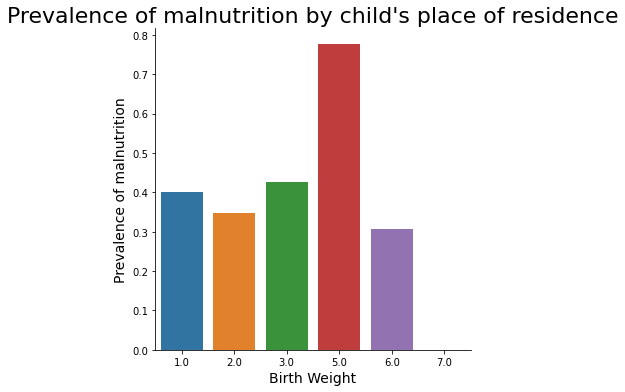

In [57]:
plt.figure(figsize=(15,6))
def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

sns.catplot(x="V103", y="Malnutrition", kind="bar", data=df,ci=None)
plt.xlabel("Birth Weight",fontsize=14)
plt.ylabel("Prevalence of malnutrition",fontsize=14)
plt.xticks(rotation=0)
plt.title("Prevalence of malnutrition by child's place of residence",fontsize=22);

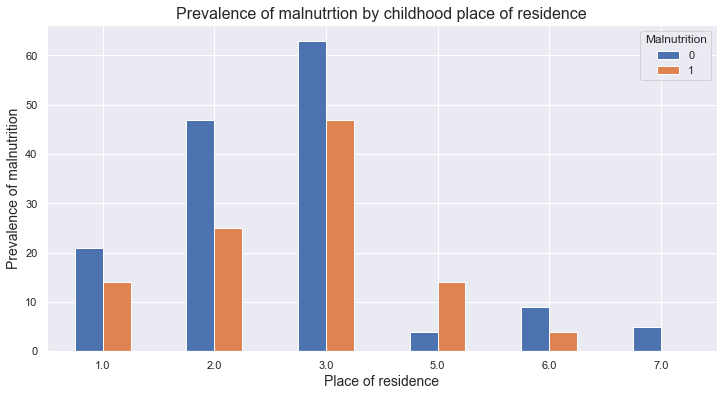

In [157]:
# V103 -childhood place of residence
# 0	capital, large city
# 1	city
# 2	town
# 3	rural area
# 4	abroad
# 5	farm
# 6	tribal area
#7	informal settlement

# From the plot below it is clear that the prevalence of malnutrition is higher among children from rural areas
# folowed by those residing in towns

def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

size = pd.crosstab(df['V103'], df['Malnutrition'])
size.plot(kind='bar', stacked=False, figsize=(12,6))
plt.xlabel("Place of residence",fontsize=14)
plt.ylabel("Prevalence of malnutrition",fontsize=14)
plt.xticks(rotation=0)
plt.title("Prevalence of malnutrtion by childhood place of residence",fontsize=16);

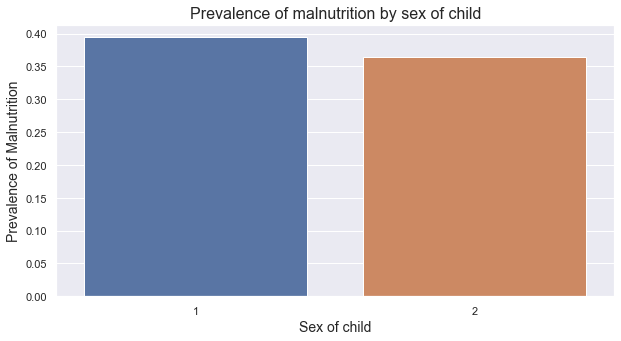

In [158]:
# Child's Age and Gender
# 1	male
# 2	female

def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

plt.figure(figsize = (10,5))
sns.barplot(x='B4',y='Malnutrition',data=df,ci=None)
plt.xlabel("Sex of child",fontsize=14)
plt.ylabel("Prevalence of Malnutrition",fontsize=14)
plt.xticks(rotation=0)
plt.title("Prevalence of malnutrition by sex of child",fontsize=16);

# Prevalence of malnutrition tends to be higher among male children than female children

#### Here we'll be looking at the individual malnutrition indicators to see how they relate to other variables individually

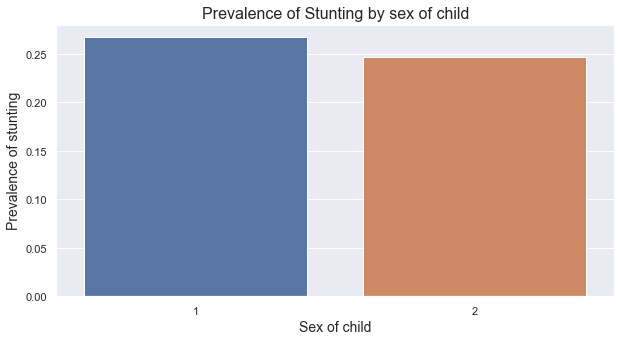

In [159]:
# Stunting

def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

plt.figure(figsize = (10,5))
sns.barplot(x='B4',y='Stunting',data=df,ci=None)
plt.xlabel("Sex of child",fontsize=14)
plt.ylabel("Prevalence of stunting",fontsize=14)
plt.xticks(rotation=0)
plt.title("Prevalence of Stunting by sex of child",fontsize=16);


# Stunting tends to be higher among male children (27%) than female children (23%). 

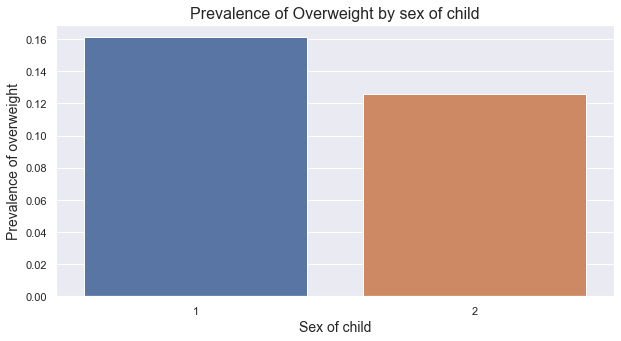

In [160]:
# Overweight

# Prevalence of overweight tends to be higher among male children

def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

plt.figure(figsize = (10,5))
sns.barplot(x='B4',y='Overweight',data=df,ci=None)
plt.xlabel("Sex of child",fontsize=14)
plt.ylabel("Prevalence of overweight",fontsize=14)
plt.xticks(rotation=0)
plt.title("Prevalence of Overweight by sex of child",fontsize=16);

#### Let's now look at how numeric variables relate to the prevalence of malnutrition

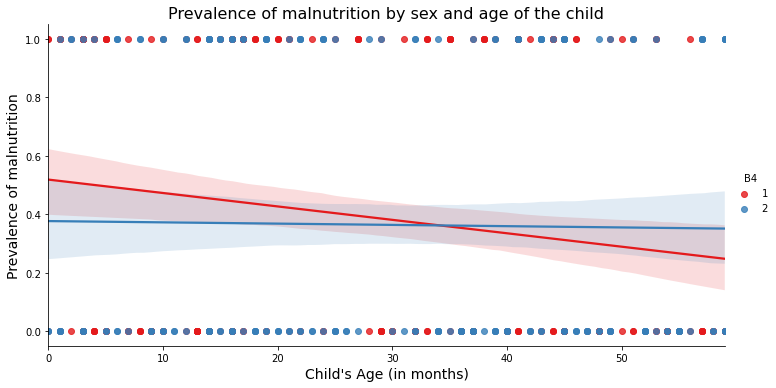

In [38]:
# Child's Age and Gender
# 1	male
# 2	female

# The plot below shows that the prevalence of malnutrition decreases 
# with an increase in child's age for both male and female children
def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

sns.lmplot(x='HW1',y='Malnutrition',hue='B4',data=df, palette='Set1',aspect=2)
plt.xlabel("Child's Age (in months)",fontsize=14)
plt.ylabel("Prevalence of malnutrition",fontsize=14)
plt.xticks(rotation=0)
plt.title("Prevalence of malnutrition by sex and age of the child",fontsize=16);

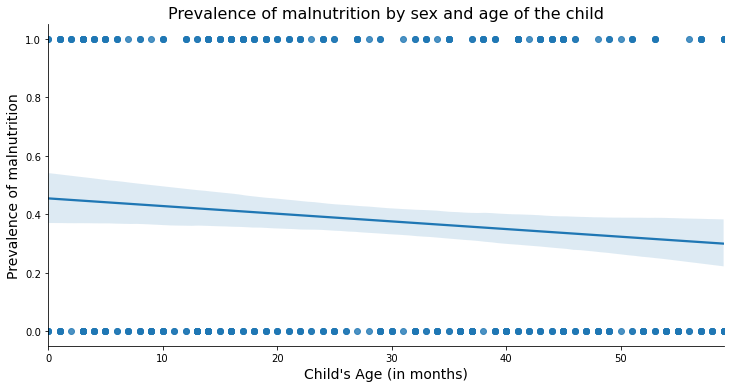

In [33]:
def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

sns.lmplot(x='HW1',y='Malnutrition',data=df, palette='Set1',aspect=2)
plt.xlabel("Child's Age (in months)",fontsize=14)
plt.ylabel("Prevalence of malnutrition",fontsize=14)
plt.xticks(rotation=0)
plt.title("Prevalence of malnutrition by sex and age of the child",fontsize=16);

In [ ]:
def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

sns.catplot(x="M18", y="Malnutrition", kind="bar", data=df,ci=None)
plt.xlabel("Birth Weight",fontsize=14)
plt.ylabel("Prevalence of malnutrition",fontsize=14)
plt.xticks(rotation=0)
plt.title("Prevalence of malnutrition by child's birth weight",fontsize=22);

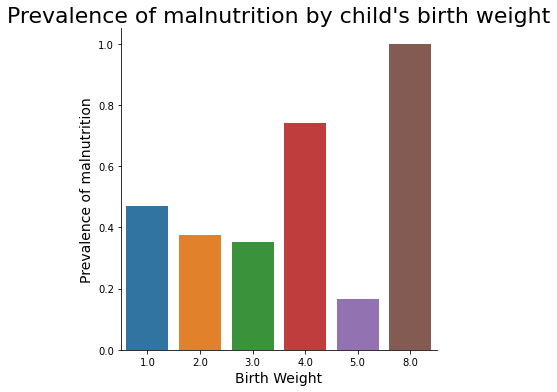

In [47]:
def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

sns.catplot(x="M18", y="Malnutrition", kind="bar", data=df,ci=None)
plt.xlabel("Birth Weight",fontsize=14)
plt.ylabel("Prevalence of malnutrition",fontsize=14)
plt.xticks(rotation=0)
plt.title("Prevalence of malnutrition by child's birth weight",fontsize=22);

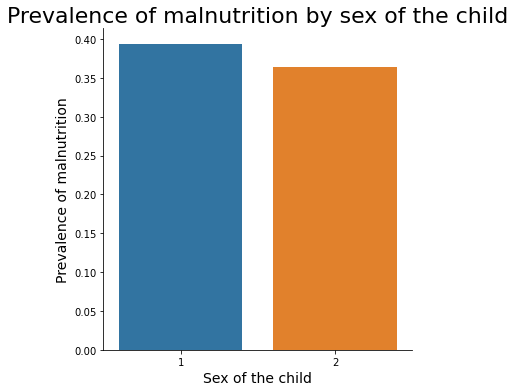

In [43]:
def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

sns.catplot(x="B4", y="Malnutrition", kind="bar", data=df,ci=None)
plt.xlabel("Sex of the child",fontsize=14)
plt.ylabel("Prevalence of malnutrition",fontsize=14)
plt.xticks(rotation=0)
plt.title("Prevalence of malnutrition by sex of the child",fontsize=22);

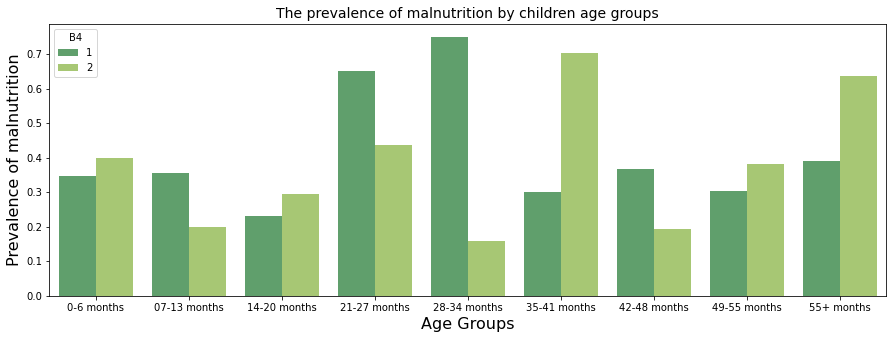

In [53]:
# Here we look at how children's age groups relate to the prevalence of malnutrition

def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

# first create age groups as follows
age2 = df['HW1'].values

category2 = []
for i in age2:
    if i >=0 and i <=6:
        category2.append("0-6 months")
    elif i>=7 and i<=13:
        category2.append("07-13 months")
    elif i>=14 and i<=20:
        category2.append("14-20 months")
    elif i>=21 and i<=27:
        category2.append("21-27 months")
    elif i>=28 and i<=34:
        category2.append("28-34 months")
    elif i>=35 and i<=41:
        category2.append("35-41 months")
    elif i>=42 and i<=48:
        category2.append("42-48 months")
    elif i>=49 and i<=55:
        category2.append("49-55 months")
    else:
        category2.append("55+ months")

        
plt.figure(figsize=(15,5))
ax2 = sns.barplot(x=category2,y='Malnutrition',hue='B4',data = df,palette='summer',
                                                    ci=None,order=category2.sort(reverse=False))
#ax2 = sns.lineplot(x=category2, y='Malnutrition', data = df,color='red',marker='o',ci=None)

plt.xlabel("Age Groups",fontsize=16)
plt.ylabel("Prevalence of malnutrition",fontsize=16)
plt.title("The prevalence of malnutrition by children age groups",fontsize=14)
plt.show()


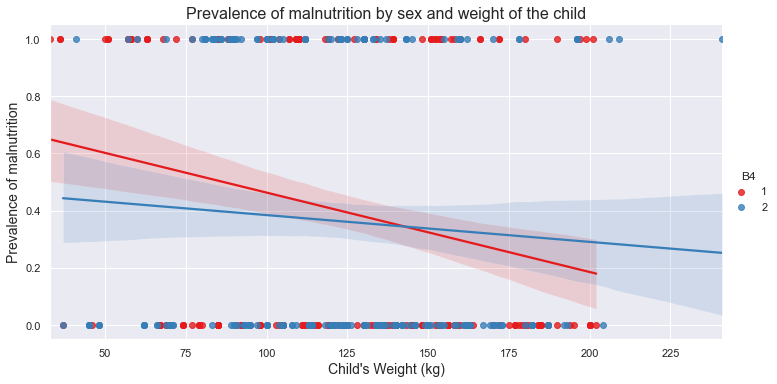

In [163]:
# Child's Weight(kg) - HW2

def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

sns.lmplot(x='HW2',y='Malnutrition',hue='B4',data=df, palette='Set1',aspect=2)
plt.xlabel("Child's Weight (kg)",fontsize=14)
plt.ylabel("Prevalence of malnutrition",fontsize=14)
plt.xticks(rotation=0)
plt.title("Prevalence of malnutrition by sex and weight of the child",fontsize=16);

# Prevalence of malnutrition decreases as the child's weight increases for both male and female children
# but this was seen as the prevalence of overweight is lower than other malnutrition indicators

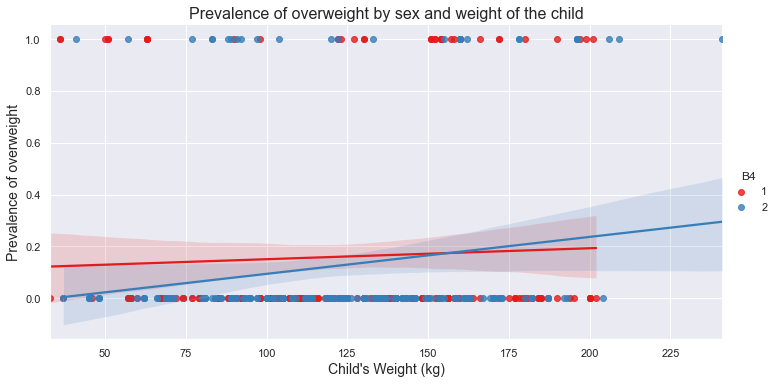

In [164]:
# Child's Weight(kg) - HW2

def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

sns.lmplot(x='HW2',y='Overweight',hue='B4',data=df, palette='Set1',aspect=2)
plt.xlabel("Child's Weight (kg)",fontsize=14)
plt.ylabel("Prevalence of overweight",fontsize=14)
plt.xticks(rotation=0)
plt.title("Prevalence of overweight by sex and weight of the child",fontsize=16);

# Looking at overweight individually, it can be seen that the prevalence of 
# overweight increases as the child gains weight (weight increases) for both male and female children
# which makes sense

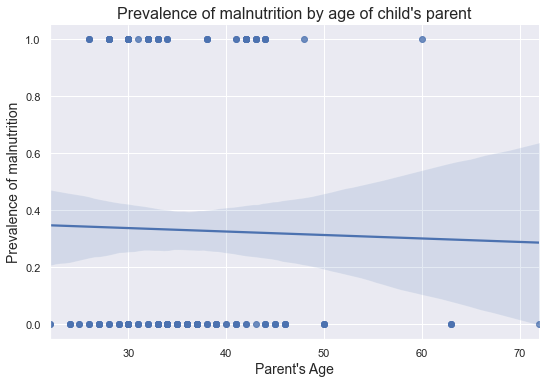

In [165]:
# Age of parent - V730

def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

sns.lmplot(x='V730',y='Malnutrition',data=df, palette='Set1',aspect=1.5)
plt.xlabel("Parent's Age",fontsize=14)
plt.ylabel("Prevalence of malnutrition",fontsize=14)
plt.xticks(rotation=0)
plt.title("Prevalence of malnutrition by age of child's parent",fontsize=16);

# No clear realationship of parent's age on the child's prevalence of malnutrition

#### Check for relationships amongst other numeric variables

In [22]:
# numeric variables 

num = ['HW1','V012','V152','V212','V730','B19','B8','V107','V715','M18','V201']
num_var = selected_data.loc[:,num]

In [167]:
# Skewness
num_var.skew()

HW1             0.022002
V012            0.370351
V152            0.497051
V212            1.202319
V730            0.667509
B19             0.021615
B8              0.011485
V107           -0.015474
V715            9.028804
M18             0.868720
V190            0.305841
V190A           0.180551
V191           -0.311811
V201            1.511871
Malnutrition    0.534944
dtype: float64

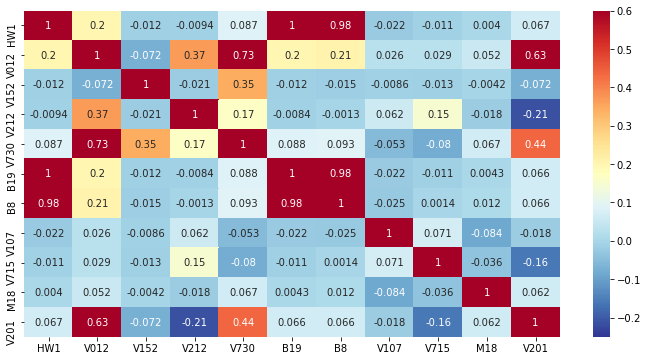

In [25]:
# Checking for Multicollinearity among variables 


plt.figure(figsize = (12,6))
sns.heatmap(num_var.corr(), cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6);

In [169]:
# Multicollinearity can be a problem in a model because we would not be able to distinguish between 
# the individual effects of the independent variables on the dependent variable.
# Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features.

# From the above heatmap correlation, multicollinearity can be seen among some independent variables
# These are the variables whose correlation is shaded in red in the heatmap, besides the correlations in diagonals, 
# indicating that these variables are highly correlated with each other.
# The variables are:
  # B19,B8, HW1 - refering to child's age
  # V190,V190A,V191 - refering to wealth index
  # V730,V012 - refering to parent's/respondent's age
  # 201,V012
# We will only keep some of these variablesin the model.
# Variables to be used in the model from these variables are:
  # HW1, V190, V012

In [ ]:
num = ['HW1','V012','V152','V212','V730','B19','B8','V107','V715','M18','V201']
num_var = selected_data.loc[:,num]

In [78]:
# Dropping some of the variables that are highly correlated since they will not be used in the model

selected_data = selected_data.drop(['B19','B8','V201','HW70','HW71','HW72'],axis=1)

In [79]:
# Dropping some of the redundant categorical variables, also highly correlated among each other

selected_data = selected_data.drop(['V717','V704','V705','V702','V149','V133','V730','V701','V715','V729','V212'],axis=1)

KeyError: "['V717' 'V704' 'V705' 'V702' 'V149' 'V133' 'V730' 'V701' 'V715' 'V729'\n 'V212'] not found in axis"

In [80]:
selected_data.head()

,V012,V152,V151,B4,V106,V107,V113,V103,V024,V025,...,V136,V153,V190,V190A,V191,Sample_Weight,Malnutrition,MIV103,MIV409,MIV107
2,41,43,1,2,2,5.0,11,3.0,7,1,...,5,0,5,5,132058,1.396726,1,1,1,0
11,26,60,2,2,2,5.0,12,3.0,5,2,...,8,0,2,4,-17777,1.206331,1,0,1,0
23,31,45,2,1,2,5.0,12,3.0,5,2,...,5,0,3,5,28812,1.206331,1,1,1,0
24,22,45,2,1,2,5.0,12,3.0,5,2,...,5,0,3,5,28812,1.206331,1,0,0,0
51,25,54,1,2,2,5.0,42,3.0,8,2,...,10,0,1,1,-225902,0.513611,0,1,1,0


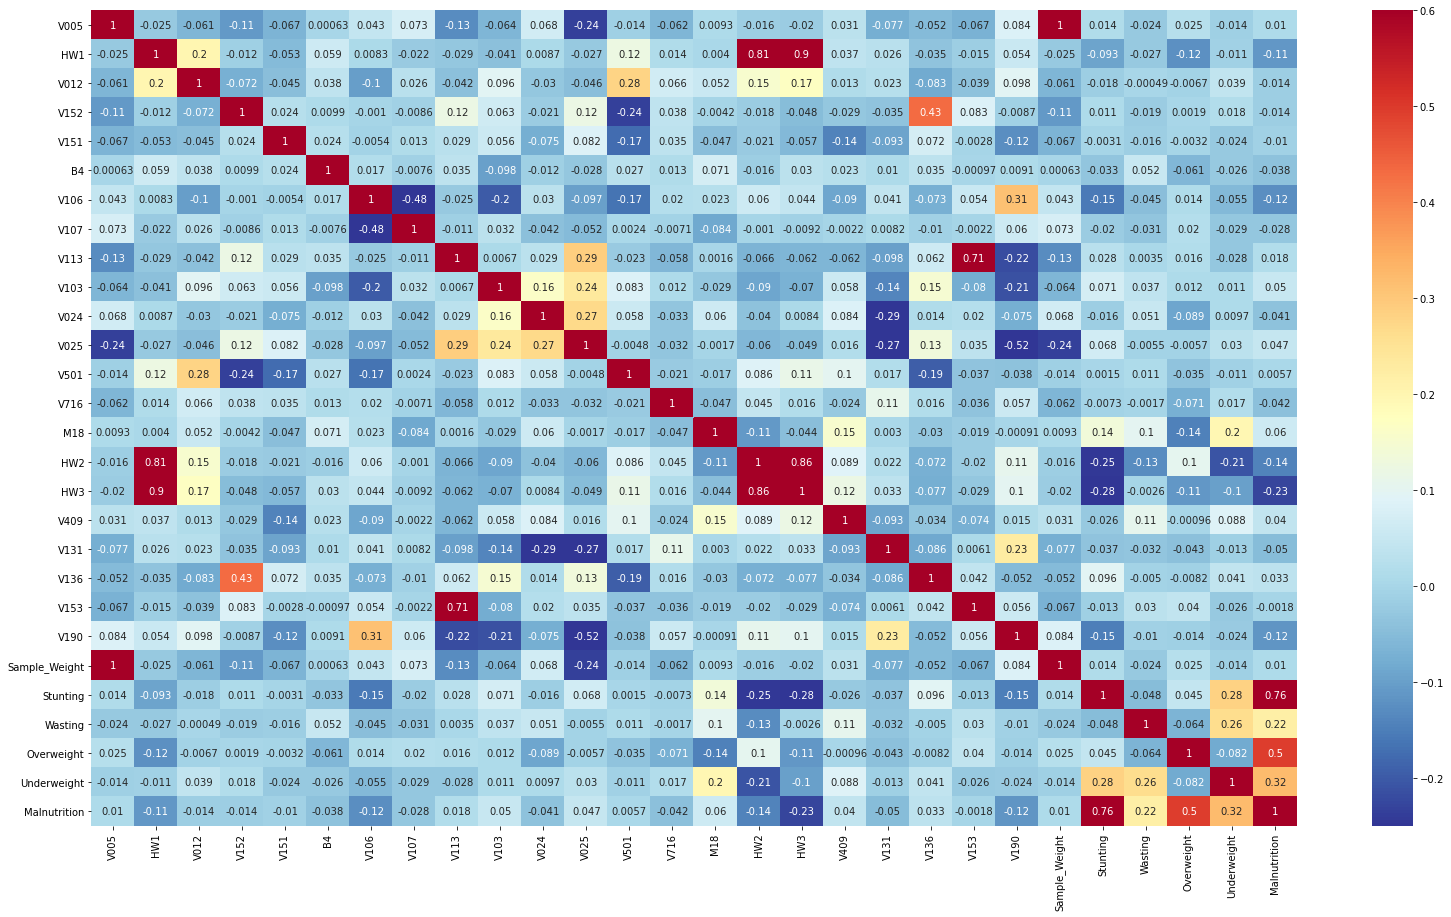

In [151]:
# Looking at the heatmap correlation again, we can see that we are remaining with independent variables that are 
# less correlated with each other
# Also it can be noted that Child's Age(HW1), Height(HW3) and Weight (HW2) are highly correlated
plt.figure(figsize = (27,15))

sns.heatmap(selected_data.corr(), cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6);

In [46]:
# Very few variables have missing information now
# We will deal with missing values 

# Percentage of missing values
selected_data.isnull().sum().sort_values(ascending = False)/len(selected_data)*100 

V103             53.673835
V409             50.716846
V107              2.060932
Malnutrition      0.000000
V501              0.000000
HW1               0.000000
V012              0.000000
V152              0.000000
V151              0.000000
B4                0.000000
V106              0.000000
V113              0.000000
V024              0.000000
V025              0.000000
V716              0.000000
Underweight       0.000000
M18               0.000000
HW2               0.000000
HW3               0.000000
V131              0.000000
V136              0.000000
V153              0.000000
V190              0.000000
Sample_Weight     0.000000
Stunting          0.000000
Wasting           0.000000
Overweight        0.000000
V005              0.000000
dtype: float64

### Below well will be looking at distributions of the numeric variables

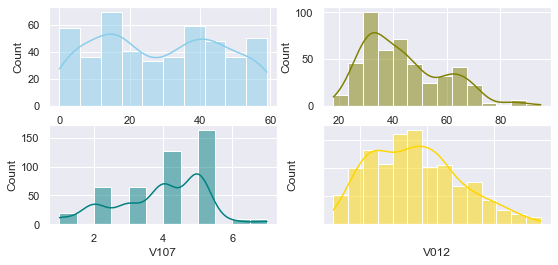

In [63]:
def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(9, 4))

sns.histplot(data=df, x="HW1", kde=True, color="skyblue",ax=axs[0, 0])
sns.histplot(data=df, x="V152", kde=True, color="olive",ax=axs[0, 1])
sns.histplot(data=df, x="V107", kde=True, color="teal",ax=axs[1, 0])
sns.histplot(data=df, x="V012", kde=True, color="gold",ax=axs[1, 1])
plt.tick_params(labelcolor='none');

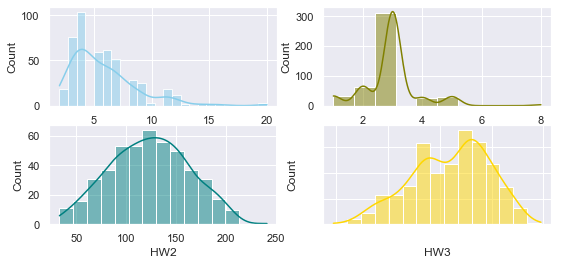

In [64]:
def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(9, 4))

sns.histplot(data=df, x="V136", kde=True, color="skyblue",ax=axs[0, 0])
sns.histplot(data=df, x="M18", kde=True, color="olive",ax=axs[0, 1])
sns.histplot(data=df, x="HW2", kde=True, color="teal",ax=axs[1, 0])
sns.histplot(data=df, x="HW3", kde=True, color="gold",ax=axs[1, 1])
plt.tick_params(labelcolor='none');

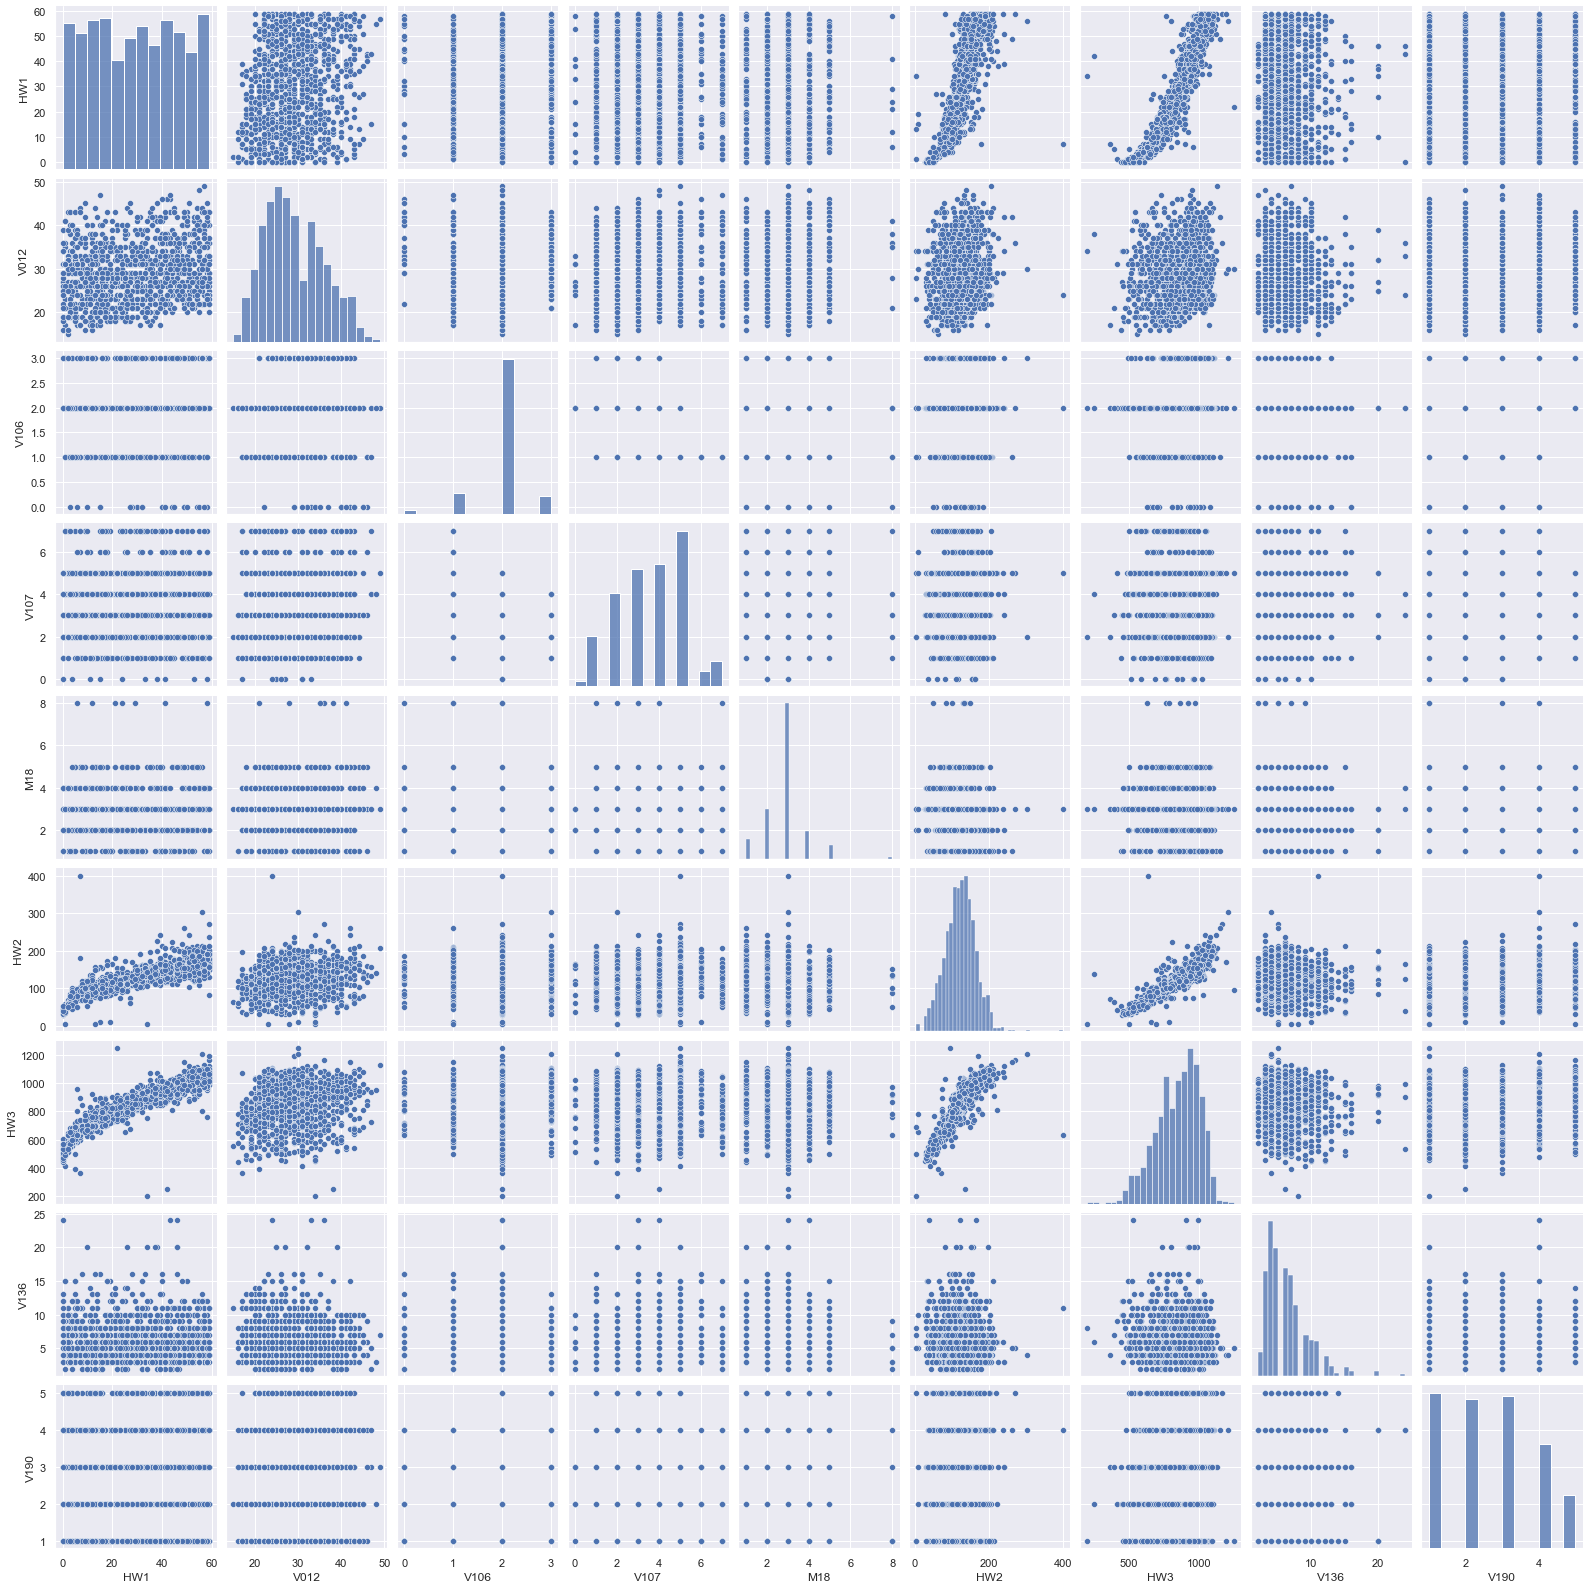

In [65]:
# Scatterplot matrix
sns.pairplot(selected_data, vars=['HW1','V012','V106','V107','M18','HW2','HW3','V136','V190'])
plt.show()

## Data preprocessing

##### Here we'll first deal with missing values for the variables that still have missing information 

In [66]:
# let's first look at the descriptive stats for these variables
selected_data[['V103','V409','V107']].describe()

,V103,V409,V107
count,517.000000,550.000000,1093.000000
mean,2.970986,0.703636,3.635865
std,1.406357,0.557598,1.547500
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000
50%,3.000000,1.000000,4.000000
75%,3.000000,1.000000,5.000000
max,7.000000,8.000000,7.000000


In [81]:
# Dealing with missing values for the variables that still have missing information
# Use Median + Missing value indicators

#missing value indicators (MIVariableName)
selected_data['MIV103'] = np.where(np.isnan(selected_data['V103'].values), 1, 0)     
selected_data['MIV409'] = np.where(np.isnan(selected_data['V409'].values), 1, 0)  
selected_data['MIV107'] = np.where(np.isnan(selected_data['V107'].values), 1, 0)  

In [82]:
# Now fill in the missing information of the variables using median

selected_data['V103'].fillna(selected_data['V103'].median(), inplace=True)
selected_data['V409'].fillna(selected_data['V409'].median(), inplace=True)
selected_data['V107'].fillna(selected_data['V107'].median(), inplace=True)

In [83]:
# Check how it looks like after filling in the misssingness
selected_data[['V103','V409','V107','MIV103','MIV409','MIV107']].head()

,V103,V409,V107,MIV103,MIV409,MIV107
2,3.0,1.0,5.0,0,0,0
11,3.0,1.0,5.0,0,0,0
23,3.0,1.0,5.0,0,0,0
24,3.0,0.0,5.0,0,0,0
51,3.0,1.0,5.0,0,0,0


In [178]:
# The data is clean now and doesn't not contain any missing inforamtion
# we can start with Machine Learning

## Machine Learning

In [71]:
#install xgboost
!pip install xgboost

In [64]:
# import machine learning libraries that will be used
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import confusion_matrix, precision_score, plot_confusion_matrix,classification_report
from sklearn import metrics
from sklearn.metrics import auc,roc_curve

from xgboost import XGBClassifier

In [84]:
# The whole dataset contains the dependent variables (Malnutrition) and the indicators of malnutrition(wasting, stunting, etc)
# so we will only use Malnutrition variable as the dependent variable and exclude these as they are only the indicators

selected_data = selected_data.drop(['Stunting','Wasting','Overweight','Underweight','V005','HW1','HW2','HW3'],axis=1)

KeyError: "['Stunting' 'Wasting' 'Overweight' 'Underweight' 'V005' 'HW1' 'HW2' 'HW3'] not found in axis"

# Training Models

In [85]:


# incorporate for sampling weight in the model
def reindex_df(df, weight_col):
    df = selected_data.reindex(selected_data.index.repeat(df[weight_col]))
    df.reset_index(drop=True, inplace=True)
    return(df)

df = reindex_df(selected_data, weight_col = 'Sample_Weight')

# define dependent variables (y) and independent variables(X)
X = df.drop('Malnutrition',axis=1)
y = df['Malnutrition']

In [86]:
# Split the data into training (70%) and test set(30%)
#set random state to ensure that the splits that we generate are reproducible.

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

#### 1. Random Forest

In [87]:
# Random forests are commonly reported as the most accurate learning algorithm. 
# Since the Random Forest classifier tends to be biased towards the majority class on imbalanced target variable classes, 
# we shall place a heavier penalty on misclassifying the minority class.
# The argument value of classs_weight=‘balanced‘ can be provided to automatically use the inverse
# weighting from the training dataset, giving focus to the minority class as well.
# Random Forest has a built-in weight adjusting parameters to deal with imbalanced data.
# Since we are dealing with imbalanced data, accuracy is not a suitable metric to compare model performances.
# F1 score and AUC are better metrics in this case, we will see these below.

# Since the incorporation of sampling weight has already been sprcified on data split the model will incorporate for this
rf = RandomForestClassifier(n_estimators=145,max_depth=5,criterion='gini',class_weight='balanced'
                            ,min_samples_split=5,max_leaf_nodes=35,max_features=None,bootstrap=True)
rf.fit(X_train,y_train)
print('accurary(%):',rf.score(X_test,y_test)*100)

accurary(%): 77.30496453900709


In [88]:
# Inorder to maximize the performance of the random forest, we can perform a random search for better hyperparameters. 
# This will randomly select combinations of hyperparameters from a grid, evaluate them using cross validation
# on the training data, and return the values that perform the best.

from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search (which is the model)
estimator = RandomForestClassifier(random_state = 100)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=100)

# Fit 
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                    

In [78]:
# We can see that the best hyperparameter values are not the defaults but are as follows.
# These are the parameters that are used to fit the Random forest as they give  values that perform best
rs.best_params_

{'n_estimators': 72,
 'min_samples_split': 5,
 'max_leaf_nodes': 35,
 'max_features': None,
 'max_depth': 5,
 'bootstrap': True}

#### 2. Logistic Regression

In [90]:
# Logistic regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('accuracy:',lr.score(X_test,y_test)*100)

accuracy: 63.829787234042556


In [96]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients 

,0,0
0,V012,-0.014816
1,V152,0.000657
2,V151,-0.001767
3,B4,-0.001431
4,V106,-0.001789
5,V107,0.000484
6,V113,-0.005330
7,V103,-0.002543
8,V024,0.000753
9,V025,-0.001412


#### 3. eXtreme Gradient Boosting (XG Boost)

In [89]:
# XGBoost

# XGBoost works by correcting the previous mistake done by the model, 
# it learns from it and its next step improves the performance. 
# The previous results are rectified and performance is enhanced.
# This gets continued until there is no scope of further improvements. 
# Regularization is the feature that is dominant for this type of predictive algorithm. 
# It is fast to execute and gives good accuracy. 
# It has an ability to handle missing values, imbalanced data and prevent overfitting (using learning_rate).

xgb = XGBClassifier(n_estimators=44,max_depth=11,learning_rate=0.1,class_weight='balanced',criterion='friedman_mse',
                objective = "binary:logistic",min_samples_split=10,max_leaf_nodes=42,max_features=0.79,
                    bootstrap=False,verbose=0)
xgb.fit(X_train,y_train)
print('accuracy:',xgb.score(X_test,y_test)*100)

[23:57:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { bootstrap, class_weight, criterion, max_features, max_leaf_nodes, min_samples_split, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:57:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 75.177304964539


# Evaluation of Models

In [102]:
# Comparing the models usingon F1-Score and AUC
# It can be seen that Random forest performs best

from sklearn.metrics import f1_score

print(f"F1-score of Random Forest classifier is {f1_score(rf.predict(X_test),y_test)}")
print(f"F1-score of XGB classifier is {f1_score(xgb.predict(X_test),y_test)}")
print(f"F1-score of Logistic Regression is {f1_score(lr.predict(X_test),y_test)}")

print(f"AUC of Random Forest classifier is {roc_auc_score(rf.predict(X_test),y_test)}")
print(f"AUC of XGB classifier is {roc_auc_score(xgb.predict(X_test),y_test)}")
print(f"AUC of Logistic Regression is {roc_auc_score(lr.predict(X_test),y_test)}")

F1-score of Random Forest classifier is 0.6382978723404256
F1-score of XGB classifier is 0.6741573033707866
F1-score of Logistic Regression is 0.40506329113924044
AUC of Random Forest classifier is 0.7416943521594683
AUC of XGB classifier is 0.7927950945324476
AUC of Logistic Regression is 0.6308470290771175


In [83]:
# Misclassification rate (%): The percentage of incorrectly classified instances are nothing, 
# but the misclassification rate of the classifier and can be calculated as:
 # missclassification = (FP + FN)/Total Instances

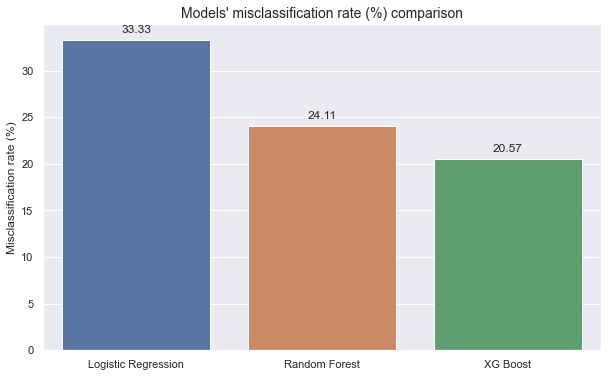

In [103]:
# Misclassification rate for the models on validation set - we want the misclassification rate to be as low as possible
# The a model with the lowest misclassification rate perfoms best
# Clearly XG Boost has the lowest misclassification rate 

plt.figure(figsize=(10,6))

plot = sns.barplot(x=["Logistic Regression","Random Forest","XG Boost"],
            y=[round((1-lr.score(X_test,y_test))*100,2),round((1-rf.score(X_test,y_test))*100,2),
               round((1-xgb.score(X_test,y_test))*100,2)])
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel("Misclassification rate (%)")
plt.title("Models' misclassification rate (%) comparison",fontsize=14)
plt.show()

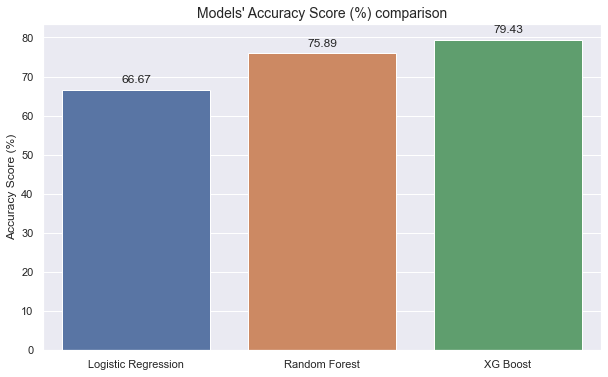

In [104]:
#From the plot below it can bee seen that XGB boost achived the best classification accuracy of 82%
# This means that this model can correcly classify kids as being normal or malnourished with 82% accuracy

plt.figure(figsize=(10,6))
plot = sns.barplot(x=["Logistic Regression","Random Forest","XG Boost"],
            y=[round(accuracy_score(lr.predict(X_test),y_test)*100,2),round(accuracy_score(rf.predict(X_test),y_test)*100,2),
               round(accuracy_score(xgb.predict(X_test),y_test)*100,2)])
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel("Accuracy Score (%)")
plt.title("Models' Accuracy Score (%) comparison",fontsize=14)
plt.show()

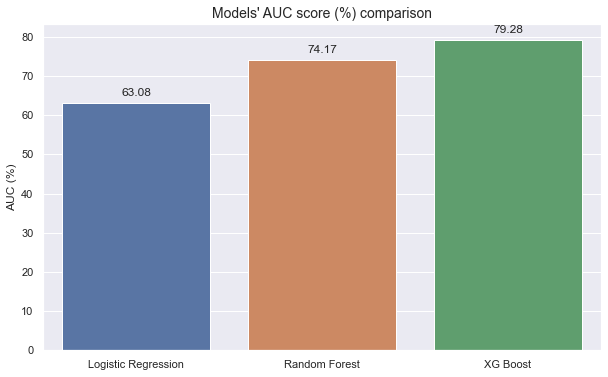

In [105]:
# Graphical representation of the model's AUC comparison 
# The closer the AUC score to 1(or 100%) the better
# The XGBoost achieved the best AUC score. This means that this model is doing a good job 
# in differetiating between the two groups of children (Malnourished vs. Normal)

plt.figure(figsize=(10,6))
plot = sns.barplot(x=["Logistic Regression","Random Forest","XG Boost"],
            y=[round(roc_auc_score(lr.predict(X_test),y_test)*100,2),round(roc_auc_score(rf.predict(X_test),y_test)*100,2),
               round(roc_auc_score(xgb.predict(X_test),y_test)*100,2)])
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel("AUC (%)")
plt.title("Models' AUC score (%) comparison",fontsize=14)
plt.show()

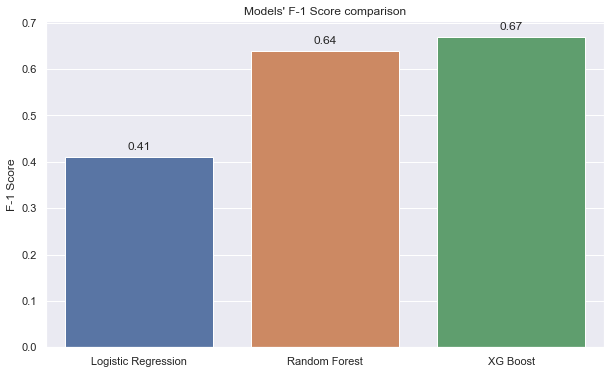

In [106]:
# Graphical representation of the model's F-1 Score comparison 

plt.figure(figsize=(10,6))
plot = sns.barplot(x=["Logistic Regression","Random Forest","XG Boost"],
            y=[round((f1_score(lr.predict(X_test),y_test)),2),round((f1_score(rf.predict(X_test),y_test)),2),
               round((f1_score(xgb.predict(X_test),y_test)),2)])
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel("F-1 Score")
plt.title("Models' F-1 Score comparison")
plt.show()

## Final model selected to identify important features : XG Boost - performed best

In [57]:
y_pred = xgb.predict(X_test)

Precision Score: 78.947368


<Figure size 864x576 with 0 Axes>

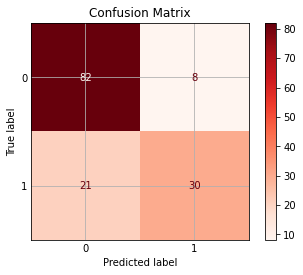

In [58]:
# Evaluate the XGB model using Confusion matrix
plt.figure(figsize=(12,8))

print("Precision Score: %f" % (precision_score(y_test, y_pred) * 100))
plot_confusion_matrix(xgb, X_test, y_test, cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)
plt.show()

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        90
           1       0.79      0.59      0.67        51

    accuracy                           0.79       141
   macro avg       0.79      0.75      0.76       141
weighted avg       0.79      0.79      0.79       141



In [91]:
# Based on the confusion matrix and classification report above
# Looking at the precision and recall, the model is NOT biased towards the majority class since 
# it correctly classifies that a child is actually malnourished with 100% precision
# And it also correctly classifies that a child is NOT malnourished with 99% precision
# From 119 Malnourished children the model correctly classifies 80 as malnourished
# From 216 Normal children the model correctly classifies 197 as Normal
# Because higher precision means more true positives.
# That means when we are saying that a child is malnourished or Normal, it is true.
# When the precision and recall are both high, that is an indication that the classifier is doing very well.
# F1-score is a better metric when there are imbalanced classes as in this exercise
# F1-score - is the mean of Precision(Specificity) and Recall(Sensitivity) and gives a better measure of the
# incorrectly classified cases than the Accuracy Metric.
# F1-score conveys the balance between the Precision and the Recall because we want Precision and Recall to
# be both as close to 1 as possible.
# ROC can be broken down into sensitivity and specificity. 
# Choosing the best model is sort of a balance between predicting 1's accurately or 0's accurately.
# In other words sensitivity and specificity

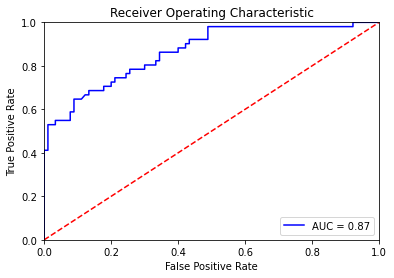

In [61]:
# ROC CURVE FOR THE XGB MODEL
probs = xgb.predict_proba(X_test)  
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

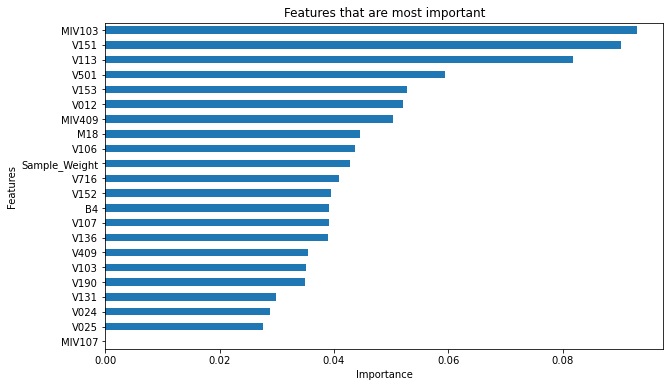

In [62]:
# Important features
# The feature importances in a random forest indicate the sum of the reduction in Gini Impurity 

plt.figure(figsize=(10,6))

feat_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(40).plot(kind='barh')
importances = xgb.feature_importances_
indices = np.argsort(importances)


plt.xlabel('Importance')
plt.ylabel('Features')
plt.title("Features that are most important")
plt.show()

[19:51:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


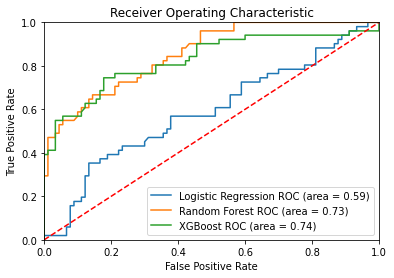

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'Random Forest',
    'model':RandomForestClassifier(),
},
{
    'label': 'XGBoost',
    'model': XGBClassifier(),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display